In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('Placement.csv')

In [3]:
df

,Student_ID,CGPA,IQ,Placement,unnamed
0,1,6.8,123,1,0
1,2,5.9,106,0,1
2,3,5.3,121,0,2
3,4,7.4,132,1,3
4,5,5.8,142,0,4
...,...,...,...,...,...
95,96,4.3,200,0,95
96,97,4.4,42,0,96
97,98,6.7,182,1,97
98,99,6.3,103,1,98


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
 4   unnamed     100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [5]:
df.iloc[:,1:4]

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [6]:
import matplotlib.pyplot as plt

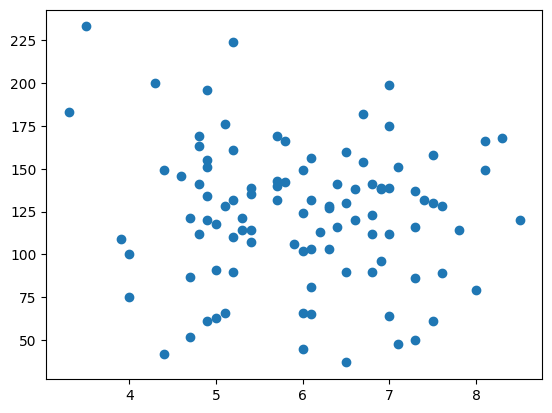

In [7]:
plt.scatter(df['CGPA'],df['IQ'])

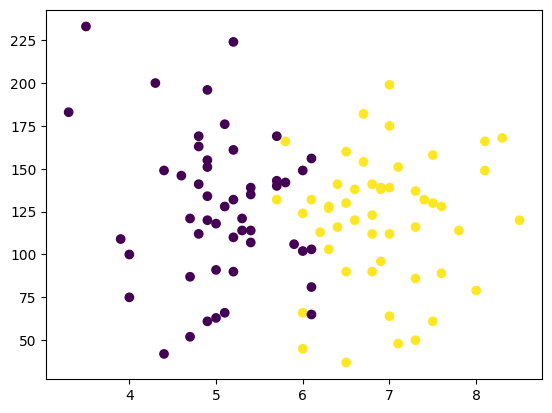

In [8]:
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement'])

In [9]:
X=df.iloc[:,1:3]
Y=df.iloc[:,-2]
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [11]:
X_train

,CGPA,IQ
24,4.7,121
84,5.7,169
28,5.2,90
88,4.4,149
17,3.3,183
...,...,...
27,6.0,124
78,6.1,81
46,5.3,114
97,6.7,182


In [12]:
Y_train

24    0
84    0
28    0
88    0
17    0
     ..
27    1
78    0
46    0
97    1
9     0
Name: Placement, Length: 90, dtype: int64

In [13]:
X_test

,CGPA,IQ
98,6.3,103
91,7.5,158
32,7.0,139
19,5.2,132
30,7.6,128
34,4.8,163
75,4.8,169
95,4.3,200
0,6.8,123
26,7.0,199


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_train

array([[-1.12604448,  0.01295827],
       [-0.243257  ,  1.22990873],
       [-0.68465074, -0.77298891],
       [-1.39088072,  0.72284604],
       [-2.36194696,  1.58485262],
       [ 2.22854796, -0.01239487],
       [-1.12604448, -1.73640802],
       [ 1.87543297,  1.15384933],
       [ 1.87543297,  0.72284604],
       [-1.39088072, -1.98993937],
       [-1.74399572, -0.51945756],
       [ 1.34576048,  0.24113648],
       [ 0.02157925, -1.38146414],
       [-0.94948698, -1.50822981],
       [-0.94948698,  0.87496485],
       [-2.18538946,  2.85250935],
       [-0.50809324,  0.36790215],
       [ 1.16920298, -1.78711429],
       [ 0.72780924, -0.77298891],
       [ 0.28641549,  0.16507708],
       [ 0.81608799, -0.6208701 ],
       [-0.68465074, -0.26592621],
       [-0.86120823, -1.45752354],
       [ 0.37469424, -0.1138074 ],
       [-1.83227447, -0.29127935],
       [ 0.109858  ,  0.90031798],
       [ 1.61059672, -0.16451367],
       [ 0.90436673,  1.38202754],
       [ 0.02157925,

In [17]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.28641549, -0.44339816],
       [ 1.34576048,  0.95102425],
       [ 0.90436673,  0.46931469],
       [-0.68465074,  0.29184275],
       [ 1.43403922,  0.19043021],
       [-1.03776573,  1.07778992],
       [-1.03776573,  1.22990873],
       [-1.47915947,  2.01585591],
       [ 0.72780924,  0.06366454],
       [ 0.90436673,  1.99050277]])

In [18]:
from sklearn.linear_model import LogisticRegression


In [19]:
clf=LogisticRegression()

In [20]:
clf.fit(X_train,Y_train) #modeltrain

LogisticRegression()

In [21]:
Y_predict=clf.predict(X_test)

In [22]:
Y_test

98    1
91    1
32    1
19    0
30    1
34    0
75    0
95    0
0     1
26    1
Name: Placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

1.0

<Axes: >

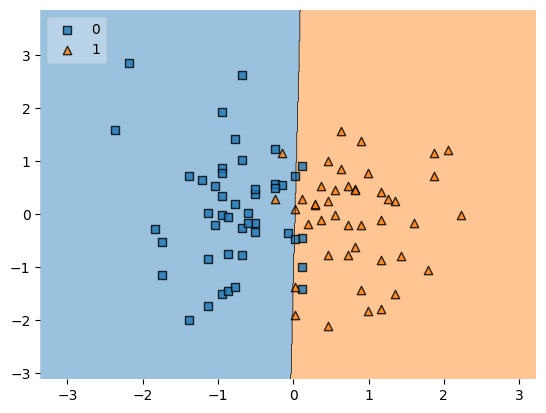

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)